# Frequenties

Eerst alle imports voor deze les:

In [5]:
import pandas as pd
import math
import statistics as stat
import matplotlib.pyplot as plt

## Data inlezen

We lezen de data in:

In [6]:
laptops = pd.read_csv("laptops.csv", sep=";", decimal=",", header=0)
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpuGeneration  852 non-null    object 
 1   cpuType        853 non-null    object 
 2   RAM            855 non-null    float64
 3   diskspace      851 non-null    float64
 4   brand          856 non-null    object 
dtypes: float64(2), object(3)
memory usage: 33.6+ KB


In [7]:
laptops.head(n=10)

,cpuGeneration,cpuType,RAM,diskspace,brand
0,Kabylake,i7,4.0,232.5,Toshiba
1,Kabylake,i5,2.0,992.5,Acer
2,Haswell,i7,16.0,495.6,Dell
3,Skylake,i7,4.0,217.2,Toshiba
4,Broadwell,i5,4.0,245.8,Acer
5,Broadwell,i5,8.0,502.6,Medion
6,Skylake,i3,4.0,224.0,HP
7,Ivy Bridge,i5,8.0,250.5,Dell
8,Skylake,i5,8.0,98.2,Medion
9,Skylake,i3,2.0,484.4,Medion


We zetten de datatypes juist:

In [8]:
cpu_generation_levels = ['Sandy Bridge', 'Ivy Bridge', 'Haswell', 'Broadwell', 'Skylake', 'Kabylake']
laptops.cpuGeneration = pd.Categorical(laptops.cpuGeneration, categories=cpu_generation_levels, ordered=True)
cpu_levels = ['i3', 'i5', 'i7']
laptops.cpuType = pd.Categorical(laptops.cpuType, categories=cpu_levels, ordered=True)
laptops.brand = pd.Categorical(laptops.brand)
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   cpuGeneration  852 non-null    category
 1   cpuType        853 non-null    category
 2   RAM            855 non-null    float64 
 3   diskspace      851 non-null    float64 
 4   brand          856 non-null    category
dtypes: category(3), float64(2)
memory usage: 16.7 KB


## Absolute frequenties

We berekenen de absolute frequenties voor cpuType:

In [9]:
freqs = laptops.cpuType.value_counts()
print(freqs)

i5    556
i3    213
i7     84
Name: cpuType, dtype: int64


In [10]:
freqs = laptops.cpuType.value_counts(dropna=False)
print(freqs)

i5     556
i3     213
i7      84
NaN      4
Name: cpuType, dtype: int64


In [11]:
freqs = laptops.cpuType.value_counts().sort_index()
print(freqs)

i3    213
i5    556
i7     84
Name: cpuType, dtype: int64


In [12]:
freqs = laptops.cpuType.value_counts(dropna=False).sort_index()
print(freqs)

i3     213
i5     556
i7      84
NaN      4
Name: cpuType, dtype: int64


## Klassen

In [13]:
freqs = laptops.diskspace.value_counts()
print(freqs)

510.6     5
488.9     4
482.9     4
494.1     4
231.3     4
         ..
493.6     1
996.7     1
482.6     1
1003.6    1
234.0     1
Name: diskspace, Length: 592, dtype: int64


In [14]:
cutpoints = range(0, 1200, 100)
print(list(cutpoints))

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]


In [15]:
klassen = pd.cut(laptops.diskspace, bins=cutpoints)
print(klassen)

0       (200.0, 300.0]
1      (900.0, 1000.0]
2       (400.0, 500.0]
3       (200.0, 300.0]
4       (200.0, 300.0]
            ...       
852                NaN
853     (200.0, 300.0]
854     (200.0, 300.0]
855     (200.0, 300.0]
856     (200.0, 300.0]
Name: diskspace, Length: 857, dtype: category
Categories (11, interval[int64, right]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] ... (700, 800] < (800, 900] < (900, 1000] < (1000, 1100]]


In [16]:
print(pd.DataFrame({'waarde':laptops.diskspace, 'klasse':klassen}))

     waarde           klasse
0     232.5   (200.0, 300.0]
1     992.5  (900.0, 1000.0]
2     495.6   (400.0, 500.0]
3     217.2   (200.0, 300.0]
4     245.8   (200.0, 300.0]
..      ...              ...
852     NaN              NaN
853   235.6   (200.0, 300.0]
854   226.6   (200.0, 300.0]
855   221.8   (200.0, 300.0]
856   234.0   (200.0, 300.0]

[857 rows x 2 columns]


Nu kunnen we de frequenties berekenen:

In [17]:
freqs = klassen.value_counts().sort_index()
print(freqs)

(0, 100]         29
(100, 200]       52
(200, 300]      407
(300, 400]        0
(400, 500]      227
(500, 600]       96
(600, 700]        0
(700, 800]        0
(800, 900]        0
(900, 1000]      19
(1000, 1100]     21
Name: diskspace, dtype: int64


In [18]:
klassen = pd.cut(laptops.diskspace, bins=cutpoints, right=False)
print(klassen.value_counts().sort_index())

[0, 100)         29
[100, 200)       52
[200, 300)      407
[300, 400)        0
[400, 500)      227
[500, 600)       96
[600, 700)        0
[700, 800)        0
[800, 900)        0
[900, 1000)      19
[1000, 1100)     21
Name: diskspace, dtype: int64


In [19]:
klassen = pd.cut(laptops.diskspace, bins=cutpoints, include_lowest=True)
print(klassen.value_counts().sort_index())

(-0.001, 100.0]      29
(100.0, 200.0]       52
(200.0, 300.0]      407
(300.0, 400.0]        0
(400.0, 500.0]      227
(500.0, 600.0]       96
(600.0, 700.0]        0
(700.0, 800.0]        0
(800.0, 900.0]        0
(900.0, 1000.0]      19
(1000.0, 1100.0]     21
Name: diskspace, dtype: int64


Aantal klassen bepalen:

Sturges:

In [20]:
diskspace = laptops.diskspace.dropna()
n = len(diskspace)
sturges = math.ceil(1 + math.log2(n))
print(sturges)

11


Scott:

In [21]:
breedte = 3.5 * stat.stdev(diskspace) / (n ** (1/3))
scott = math.ceil((diskspace.max()-diskspace.min())/breedte)
print(scott)

13


Excel:

In [22]:
excel = math.ceil(math.sqrt(n))
print(excel)

30


In [23]:
print(diskspace.value_counts(bins=11).sort_index())

(87.363, 173.345]      81
(173.345, 258.391]    407
(258.391, 343.436]      0
(343.436, 428.482]      0
(428.482, 513.527]    323
(513.527, 598.573]      0
(598.573, 683.618]      0
(683.618, 768.664]      0
(768.664, 853.709]      0
(853.709, 938.755]      0
(938.755, 1023.8]      40
Name: diskspace, dtype: int64


## Relatieve frequenties

In [24]:
freqs = laptops.brand.value_counts(normalize=True)
print(freqs)

HP         0.227804
Dell       0.188084
Acer       0.151869
Toshiba    0.151869
Lenovo     0.091121
Apple      0.075935
Asus       0.075935
Medion     0.037383
Name: brand, dtype: float64


In [25]:
freqs = (laptops.brand.value_counts(normalize=True) * 100).round(1)
print(freqs)

HP         22.8
Dell       18.8
Acer       15.2
Toshiba    15.2
Lenovo      9.1
Apple       7.6
Asus        7.6
Medion      3.7
Name: brand, dtype: float64


## Cumulatieve frequenties

In [26]:
x = pd.Series(range(1,6))
print(x.tolist())
print(x.cumsum().tolist())

[1, 2, 3, 4, 5]
[1, 3, 6, 10, 15]


In [27]:
freqs = laptops.cpuGeneration.value_counts().sort_index().cumsum()
print(freqs)

Sandy Bridge     63
Ivy Bridge      170
Haswell         336
Broadwell       554
Skylake         709
Kabylake        852
Name: cpuGeneration, dtype: int64


In [28]:
freqs = laptops.brand.value_counts().sort_index().cumsum()
print(freqs) # is dit zinvol?  Waarom of waarom niet?

Acer       130
Apple      195
Asus       260
Dell       421
HP         616
Lenovo     694
Medion     726
Toshiba    856
Name: brand, dtype: int64


## Cumulatieve percentages

Ook "percentielscores" genoemd

In [29]:
freqs = (laptops.cpuGeneration.value_counts(normalize=True).sort_index().cumsum() * 100).round(1)
print(freqs)

Sandy Bridge      7.4
Ivy Bridge       20.0
Haswell          39.4
Broadwell        65.0
Skylake          83.2
Kabylake        100.0
Name: cpuGeneration, dtype: float64


## Grafieken

Eenvoudig voorbeeld:

Text(0.5, 1.0, 'Temperatuurverloop')

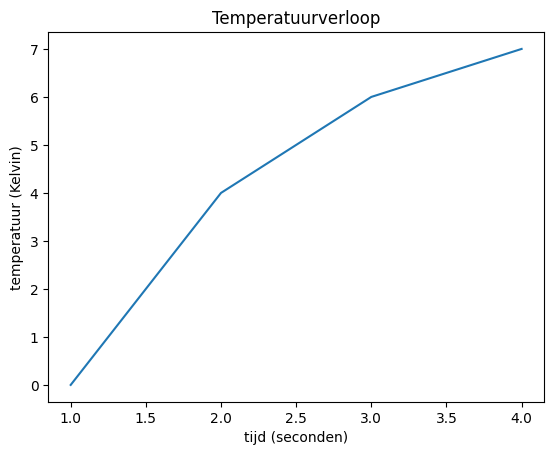

In [30]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [0,4,6,7])
ax.set_xlabel("tijd (seconden)")
ax.set_ylabel("temperatuur (Kelvin)")
ax.set_title("Temperatuurverloop")
# fig.show()
# fig.savefig('beeldje.png')

Text(0.5, 1.0, 'Temperatuurverloop')

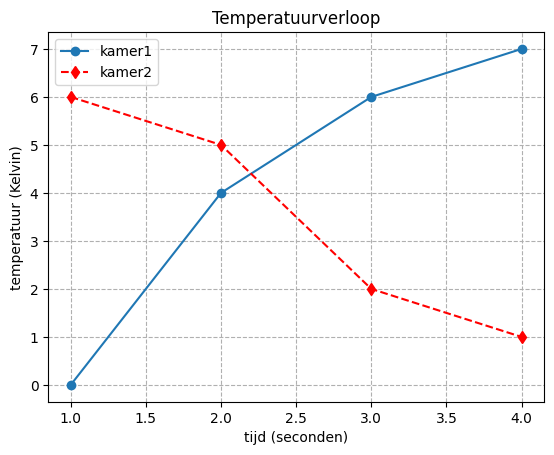

In [31]:
# iets uitgebreider
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [0, 4, 6, 7], 'o-', label='kamer1')
ax.plot(range(1,5), [6, 5, 2, 1], label='kamer2', color='red', linestyle='dashed', marker='d')
ax.legend()
ax.grid(linestyle='--')
ax.set_xlabel('tijd (seconden)')
ax.set_ylabel('temperatuur (Kelvin)')
ax.set_title('Temperatuurverloop')
# fig.show()
# fig.savefig('beeldje.png')

Taartdiagram:

Text(0.5, 1.0, 'RAM in laptops')

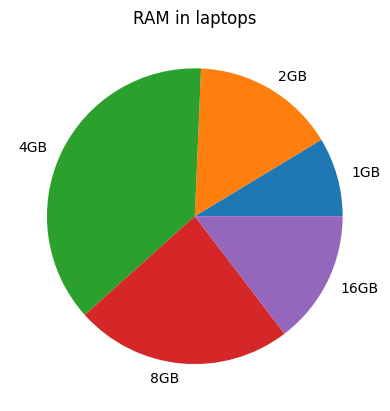

In [32]:
x = laptops.RAM.value_counts().sort_index()
l = ["1GB", "2GB", "4GB", "8GB", "16GB"]
fig, ax = plt.subplots()
ax.pie(x, labels=l)
ax.set_title("RAM in laptops")
# fig.show()

Staafdiagram:

Text(0, 0.5, 'Aantal laptops')

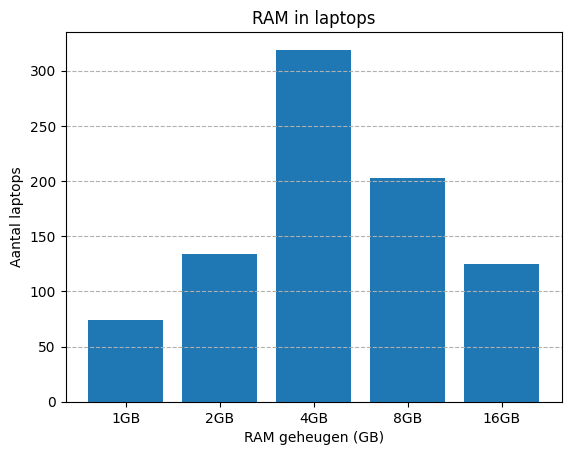

In [33]:
x = laptops.RAM.value_counts().sort_index()
l = ["1GB", "2GB", "4GB", "8GB", "16GB"]
fig, ax = plt.subplots()
ax.bar(l, x)
ax.grid(linestyle='--', axis='y')
ax.set_title("RAM in laptops")
ax.set_xlabel("RAM geheugen (GB)")
ax.set_ylabel("Aantal laptops")
# fig.show()

Histogram:

Text(0, 0.5, 'Aantal laptops')

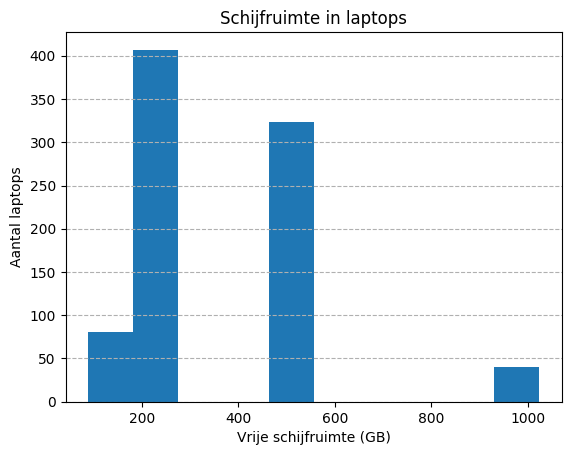

In [34]:
fig, ax = plt.subplots()
ax.hist(laptops.diskspace)
ax.grid(linestyle='--', axis='y')
ax.set_title("Schijfruimte in laptops")
ax.set_xlabel("Vrije schijfruimte (GB)")
ax.set_ylabel("Aantal laptops")
# fig.show()

Text(0, 0.5, 'Aantal laptops')

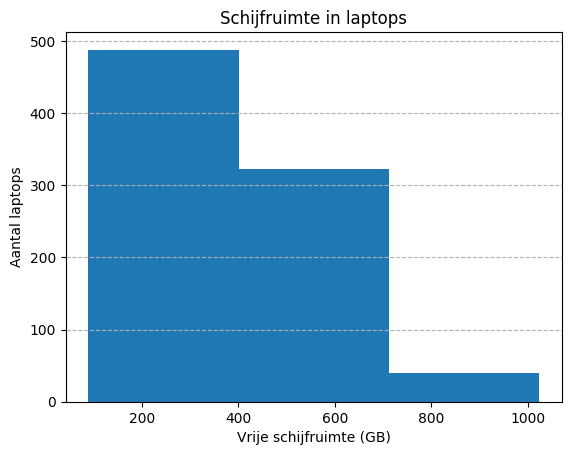

In [35]:
fig, ax = plt.subplots()
ax.hist(laptops.diskspace, bins=3)
ax.grid(linestyle='--', axis='y')
ax.set_title("Schijfruimte in laptops")
ax.set_xlabel("Vrije schijfruimte (GB)")
ax.set_ylabel("Aantal laptops")
# fig.show()

Text(0, 0.5, 'Aantal laptops')

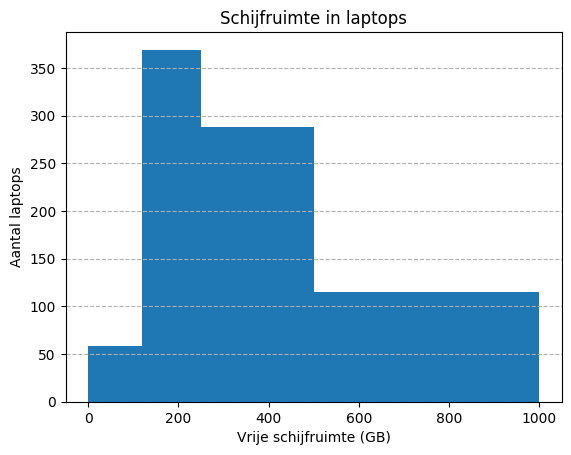

In [36]:
cutpoints = [0, 120, 250, 500, 1000]
fig, ax = plt.subplots()
ax.hist(laptops.diskspace, bins=cutpoints)
ax.grid(linestyle='--', axis='y')
ax.set_title("Schijfruimte in laptops")
ax.set_xlabel("Vrije schijfruimte (GB)")
ax.set_ylabel("Aantal laptops")
# fig.show()

Text(0, 0.5, 'Aantal laptops')

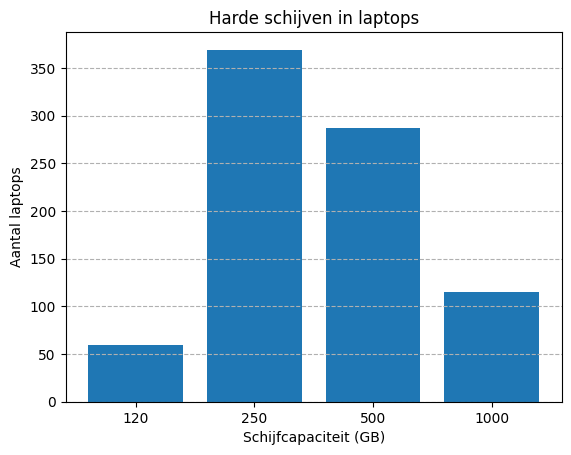

In [37]:
cutpoints = [0, 120, 250, 500, 1000]
l = ["120", "250", "500", "1000"]
x = laptops.diskspace.value_counts(bins=cutpoints).sort_index()
fig, ax = plt.subplots()
ax.bar(l, x)
ax.grid(linestyle='--', axis='y')
ax.set_title("Harde schijven in laptops")
ax.set_xlabel("Schijfcapaciteit (GB)")
ax.set_ylabel("Aantal laptops")
# fig.show()

## Spider plots

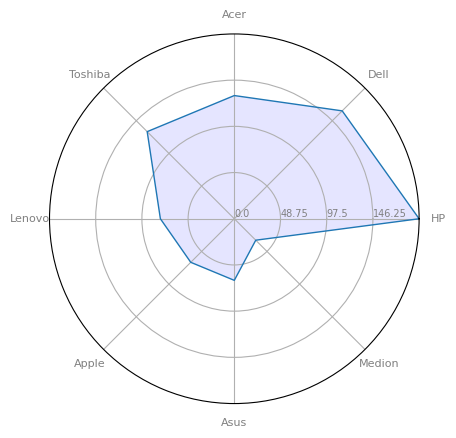

In [38]:
x = laptops.brand
freqs = x.value_counts()
categories = freqs.index
values = freqs.values.tolist()
values += values[:1]
aantal = len(freqs)
maximum = max(values)
angles = [n / float(aantal) * 2 * math.pi for n in range(aantal)]
angles += angles[:1]
plt.figure()
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([n/4*maximum for n in range(4)], [n/4*maximum for n in range(4)], color="grey", size=7)
plt.ylim(0, maximum)
plt.plot(angles, values, linewidth=1, linestyle='solid')
plt.fill(angles, values, 'b', alpha=0.1)
# plt.show()

## Wordclouds

In [40]:
import wordcloud as wc
tekst="imagine there's no heaven it's easy if you try no hell below us above us only sky imagine all the people living for today  imagine there's no countries it isn't hard to do nothing to kill or die for and no religion, too imagine all the people living life in peace you you may say I'm a dreamer but I'm not the only one I hope someday you'll join us and the world will be as one imagine no possessions I wonder if you can no need for greed or hunger a brotherhood of man imagine all the people sharing all the world you you may say I'm a dreamer but I'm not the only one I hope someday you'll join us and the world will live as one"
cloud=wc.WordCloud(max_font_size=70, max_words=20, background_color="white", random_state=13).generate(tekst)
plt.figure()
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
# plt.show()

ModuleNotFoundError: No module named 'wordcloud'